In [ ]:
# Nama: Bernard Hugo
# NIM: 2540124450
# Kelas: LA05

# GSLC Deep Learning Sesi 1
# Nomor 2

Link dataset: https://www.kaggle.com/datasets/samuelcortinhas/apples-or-tomatoes-image-classification

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory("drive/MyDrive/tomatoes_or_apples/train", validation_split = 0.2,
                                                                 subset = "training", seed = 123, image_size = (200, 200), batch_size = 32)

Found 294 files belonging to 2 classes.
Using 236 files for training.


In [ ]:
val_data = tf.keras.preprocessing.image_dataset_from_directory("drive/MyDrive/tomatoes_or_apples/train", validation_split = 0.2,
                                                               subset = "validation", seed = 123, image_size = (200, 200), batch_size = 32)

Found 294 files belonging to 2 classes.
Using 58 files for validation.


In [ ]:
test_data = tf.keras.preprocessing.image_dataset_from_directory("drive/MyDrive/tomatoes_or_apples/test", image_size = (200, 200), batch_size = 32)

Found 97 files belonging to 2 classes.


In [ ]:
pretrained_model= tf.keras.applications.ResNet50(include_top = False, input_shape = (200, 200, 3), weights = 'imagenet', pooling = 'avg')

for layer in pretrained_model.layers:
        layer.trainable = False

model = Sequential([ pretrained_model,
                     Flatten(),
                     Dense(64, activation = 'relu'),
                     Dense(1, activation = 'sigmoid')
                   ])

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 64)                131136    
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 1)                 65        
 apper)                                                          
                                                                 
Total params: 23718913 (90.48 MB)
Trainable params: 131201 (512.50 KB)
Non-trainable params: 23587712 (89.98 MB)
_________

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
train_model = model.fit(train_data, validation_data = val_data, epochs = 15)

Epoch 1/15
8/8 [==============================] - 102s 8s/step - loss: 0.6139 - accuracy: 0.6695 - val_loss: 0.3885 - val_accuracy: 0.8621
Epoch 2/15
8/8 [==============================] - 50s 6s/step - loss: 0.2609 - accuracy: 0.8941 - val_loss: 0.3701 - val_accuracy: 0.8448
Epoch 3/15
8/8 [==============================] - 47s 6s/step - loss: 0.1605 - accuracy: 0.9534 - val_loss: 0.3022 - val_accuracy: 0.8966
Epoch 4/15
8/8 [==============================] - 51s 6s/step - loss: 0.1054 - accuracy: 0.9703 - val_loss: 0.3185 - val_accuracy: 0.8793
Epoch 5/15
8/8 [==============================] - 57s 8s/step - loss: 0.0718 - accuracy: 0.9873 - val_loss: 0.3077 - val_accuracy: 0.8966
Epoch 6/15
8/8 [==============================] - 48s 6s/step - loss: 0.0568 - accuracy: 0.9915 - val_loss: 0.3022 - val_accuracy: 0.9138
Epoch 7/15
8/8 [==============================] - 49s 6s/step - loss: 0.0405 - accuracy: 0.9958 - val_loss: 0.3129 - val_accuracy: 0.9138
Epoch 8/15
8/8 [=================

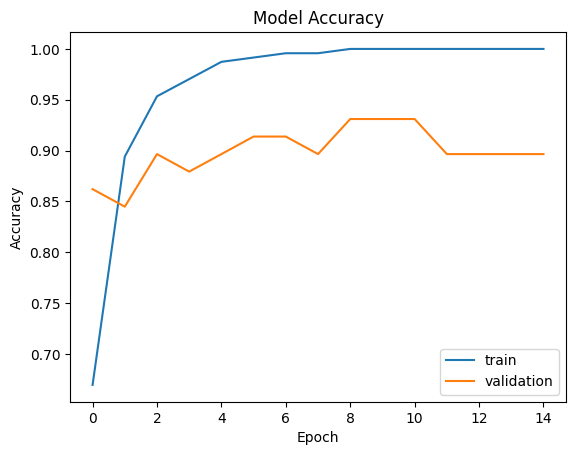

In [ ]:
plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

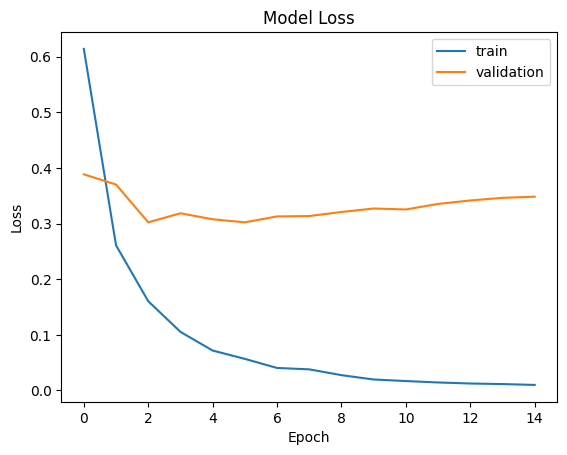

In [ ]:
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

Dari hasil kedua visualisasi grafik, dapat dilihat bahwa pada Model Accuracy bagian training menaik dan telah mencapai titik angka maksimal yaitu 1. Sedangkan, validation mencapai angka maksimal sebesar 0.9310 dari epoch 9 sampai epoch ke-11. Pada Model Loss, training mengalami penurunan loss hingga mencapai angka 0.01 sedangkan validation mengalami turun naik pada beberapa epoch dimana nilai loss terkecil adalah 0.3022 di epoch ke-6 dan nilai loss pada epoch terakhir sebesar 0.3483.

In [ ]:
model.evaluate(test_data)

4/4 [==============================] - 27s 3s/step - loss: 0.1786 - accuracy: 0.9175


[0.17864583432674408, 0.9175257682800293]

In [ ]:
eval_model = model.evaluate(test_data)

print(f'Accuracy: {eval_model[1] :.4f}')
print(f'Loss: {eval_model[0] :.4f}')

4/4 [==============================] - 16s 4s/step - loss: 0.1786 - accuracy: 0.9175
Accuracy: 0.9175
Loss: 0.1786


In [ ]:
# Prediction preprocessing

test_image1 = image.load_img("C:/Users/ASUS/Downloads/tomatoes_or_apples/test/tomatoes/img_p3_6.jpeg", target_size = (64, 64))
test_image2 = image.load_img("C:/Users/ASUS/Downloads/tomatoes_or_apples/test/apples/img_p2_84.jpeg", target_size = (64, 64))

test_image1 = image.img_to_array(test_image1)
test_image2 = image.img_to_array(test_image2)

test_image1 = np.expand_dims(test_image1, axis = 0)
test_image2 = np.expand_dims(test_image2, axis = 0)

# Make predictions on two images

print(model.predict(test_image1))

print(model.predict(test_image2))

1/1 [==============================] - 0s 218ms/step
[[0.998996]]
1/1 [==============================] - 0s 47ms/step
[[0.00117946]]


In [ ]:
# Make categorial predictions

result1 = model.predict(test_image1)
result2 = model.predict(test_image2)

if (result1 >= 0.5):
    result1 = 'tomato'
else:
    result1 = 'apple'


if (result2 >= 0.5):
    result2 = 'tomato'
else:
    result2 = 'apple'

print(f'Image 1 result: {result1}')
print()
print(f'Image 2 result: {result2}')

1/1 [==============================] - 0s 64ms/step
Image 1 result: tomato

Image 2 result: apple


Dari hasil model training model CNN, dapat dianalisiskan bahwa:

Pada epoch pertama, akurasi training berada pada nilai 0.6695 dan loss training berada pada nilai 0.6139. Serta, pada bagian validation memiliki akurasi sebesar 0,8621 dan loss sebesar 0,3885. Dari epoch 1 sampai epoch 15, akurasi untuk training meningkat dan loss-nya menurun serta akurasi untuk validation terkadang mengalami penurunan atau peningkatan di beberapa epoch. Loss untuk validation di epoch-epoch tertentu tetap stabil pada nilai 0.3. Tetapi, akurasi validation terlihat stabil dan agak lebih rendah dibandingkan dengan akurasi training pada epoch-epoch berikutnya. Hal itu terjadi karena overfitting, dimana model mencoba menyesuaikan sampel training secara berlebihan dan berkinerja buruk pada sampel validation. Sehingga, akurasi training menjadi lebih tinggi dibandingkan dengan akurasi validation.

Akurasi untuk training telah mencapai nilai maksimum (1) dari epoch 9 hingga epoch 15. Pada validation, nilai akurasi terbesar berada pada epoch 11 dengan nilai sebesar 0.9310. Hal ini menunjukkan bahwa model tersebut telah bekerja dengan baik pada data training dan validation.

Secara keseluruhan, dapat dikatakan bahwa model CNN telah menunjukkan kinerja yang baik dalam mengklasifikasikan antara tomat (tomatoes) dan apel (apples).